In [1]:
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kartik2112/fraud-detection
!unzip fraud-detection.zip

# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()

# # Download the dataset
# api.dataset_download_files('lainguyn123/student-performance-factors', path='./', unzip=True)

mkdir: /Users/matthewyakir/.kaggle: File exists
mv: kaggle.json: No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fraud-detection.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
import pandas as pd

# read in the data files that were downloaded and save as df
test_df = pd.read_csv('fraudTest.csv')
train_df = pd.read_csv('fraudTrain.csv')

# remove columns to clean df
column_keep = ['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'dob', 'is_fraud']

# clean merchant column
test_df['merchant'] = test_df['merchant'].str.split('_').str[1]
train_df['merchant'] = train_df['merchant'].str.split('_').str[1]

# one end code gender
test_df['gender'] = test_df['gender'].replace({'M': 0, 'F': 1})
train_df['gender'] = train_df['gender'].replace({'M': 0, 'F': 1})

# Create a new DataFrame with only the selected columns
test_df = test_df[column_keep]
train_df = train_df[column_keep]

# If you want to update the existing DataFrame
#df = df[columns_to_keep]

# display the dfs
print(test_df.head())
print(train_df.head())

                         merchant        category    amt  gender      lat  \
0                 Kirlin and Sons   personal_care   2.86       0  33.9659   
1                  Sporer-Keebler   personal_care  29.84       1  40.3207   
2  Swaniawski, Nitzsche and Welch  health_fitness  41.28       1  40.6729   
3                     Haley Group        misc_pos  60.05       0  28.5697   
4                 Johnston-Casper          travel   3.19       0  44.2529   

       long         dob  is_fraud  
0  -80.9355  1968-03-19         0  
1 -110.4360  1990-01-17         0  
2  -73.5365  1970-10-21         0  
3  -80.8191  1987-07-25         0  
4  -85.0170  1955-07-06         0  
                       merchant       category     amt  gender      lat  \
0          Rippin, Kub and Mann       misc_net    4.97       1  36.0788   
1     Heller, Gutmann and Zieme    grocery_pos  107.23       1  48.8878   
2                Lind-Buckridge  entertainment  220.11       0  42.1808   
3  Kutch, Hermiston a

In [4]:
import matplotlib.pyplot as plt

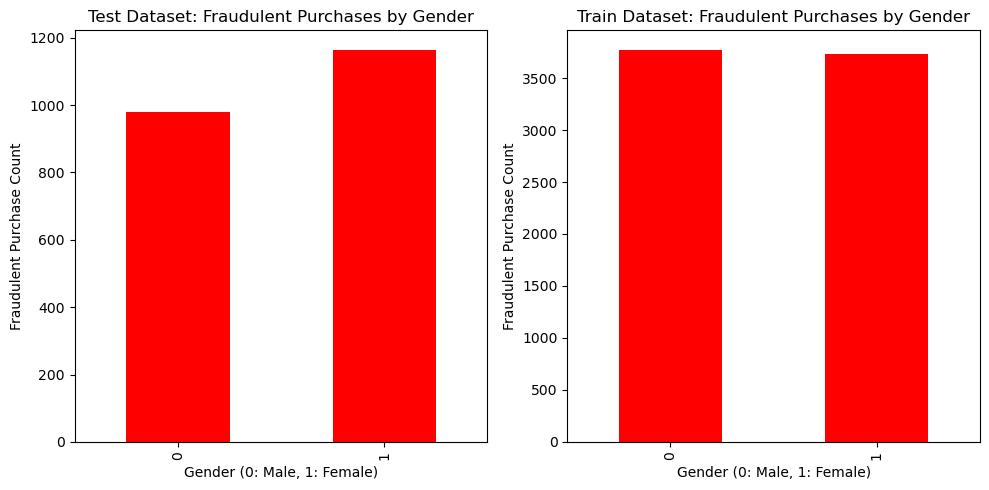

In [5]:
# Filter the data to only show fraudulent transactions and group by gender
test_fraud = test_df[test_df['is_fraud'] == 1].groupby('gender').size()
train_fraud = train_df[train_df['is_fraud'] == 1].groupby('gender').size()

# Creating subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Bar chart for test dataset showing only fraudulent purchases
test_fraud.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Test Dataset: Fraudulent Purchases by Gender')
axes[0].set_xlabel('Gender (0: Male, 1: Female)')
axes[0].set_ylabel('Fraudulent Purchase Count')

# Bar chart for train dataset showing only fraudulent purchases
train_fraud.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Train Dataset: Fraudulent Purchases by Gender')
axes[1].set_xlabel('Gender (0: Male, 1: Female)')
axes[1].set_ylabel('Fraudulent Purchase Count')

plt.tight_layout()
plt.show()

The two bar charts above show the amount of men and women who have committed credit card fraud across both datasets. Interestingly, in the test dataset the amount of women who have committed fraud is greater then the amount of men who have. However, in the train dataset the numbers are relitevely equal. Also, the difference between the amount of women and men who have committed fraud in the test dataset is only 183 (183 more women have committed fraud than men). With all this in mind it can be seen that the crime of credit card fraud is committed by both genders with relatively the same frequency.